In [1]:
import boto3

ec2 = boto3.client('ec2',  region_name='us-west-2')
response = ec2.describe_instances()
print(response)

{'Reservations': [{'Groups': [], 'Instances': [{'AmiLaunchIndex': 0, 'ImageId': 'ami-0ac73f33a1888c64a', 'InstanceId': 'i-03089adea10e630a2', 'InstanceType': 't2.micro', 'KeyName': 'megard-uswest-keypair', 'LaunchTime': datetime.datetime(2020, 12, 30, 16, 15, 31, tzinfo=tzlocal()), 'Monitoring': {'State': 'disabled'}, 'Placement': {'AvailabilityZone': 'us-west-2b', 'GroupName': '', 'Tenancy': 'default'}, 'PrivateDnsName': 'ip-10-12-69-136.us-west-2.compute.internal', 'PrivateIpAddress': '10.12.69.136', 'ProductCodes': [], 'PublicDnsName': '', 'State': {'Code': 16, 'Name': 'running'}, 'StateTransitionReason': '', 'SubnetId': 'subnet-0dd447dd1e3e8f355', 'VpcId': 'vpc-0055752230db6161d', 'Architecture': 'x86_64', 'BlockDeviceMappings': [{'DeviceName': '/dev/sda1', 'Ebs': {'AttachTime': datetime.datetime(2020, 12, 18, 14, 49, 43, tzinfo=tzlocal()), 'DeleteOnTermination': True, 'Status': 'attached', 'VolumeId': 'vol-04475ff9b8806a903'}}], 'ClientToken': '', 'EbsOptimized': False, 'EnaSuppor

In [2]:
response['Reservations'][0]['Instances']

[{'AmiLaunchIndex': 0,
  'ImageId': 'ami-0ac73f33a1888c64a',
  'InstanceId': 'i-03089adea10e630a2',
  'InstanceType': 't2.micro',
  'KeyName': 'megard-uswest-keypair',
  'LaunchTime': datetime.datetime(2020, 12, 30, 16, 15, 31, tzinfo=tzlocal()),
  'Monitoring': {'State': 'disabled'},
  'Placement': {'AvailabilityZone': 'us-west-2b',
   'GroupName': '',
   'Tenancy': 'default'},
  'PrivateDnsName': 'ip-10-12-69-136.us-west-2.compute.internal',
  'PrivateIpAddress': '10.12.69.136',
  'ProductCodes': [],
  'PublicDnsName': '',
  'State': {'Code': 16, 'Name': 'running'},
  'StateTransitionReason': '',
  'SubnetId': 'subnet-0dd447dd1e3e8f355',
  'VpcId': 'vpc-0055752230db6161d',
  'Architecture': 'x86_64',
  'BlockDeviceMappings': [{'DeviceName': '/dev/sda1',
    'Ebs': {'AttachTime': datetime.datetime(2020, 12, 18, 14, 49, 43, tzinfo=tzlocal()),
     'DeleteOnTermination': True,
     'Status': 'attached',
     'VolumeId': 'vol-04475ff9b8806a903'}}],
  'ClientToken': '',
  'EbsOptimized': 

In [3]:
response['Reservations'][0]['Instances'][0]['PrivateIpAddress']

'10.12.69.136'

In [4]:
response['Reservations'][0]['Instances'][0]['Tags'][0]['Value']

'logan-admin-persistent'

In [5]:
response['Reservations'][1]['Instances'][0]['Tags'][0]['Value']

'logan-roletrial'

In [6]:
instance_type_list=[]
for i in range(len(response["Reservations"])):
    #print(i)
    print(response['Reservations'][i]['Instances'][0]['Tags'][0]['Value'])
    print(response['Reservations'][i]['Instances'][0]['PrivateIpAddress'])
    print(response['Reservations'][i]['Instances'][0]['InstanceType'])
    instance_type_list.append(response['Reservations'][i]['Instances'][0]['InstanceType'])


logan-admin-persistent
10.12.69.136
t2.micro
logan-roletrial
10.12.69.239
t2.micro
ECO
10.12.68.150
t3a.2xlarge
EcoAI-mini-p3-0
10.12.69.149
p3.2xlarge
njpastick-rserver-0
10.12.69.111
m4.4xlarge


In [7]:
import pickle
filename='price_prune.pickle'
infile = open(filename,'rb')
df = pickle.load(infile)
infile.close()

In [8]:
def return_price(data_frame, instance_type):
    wdf = data_frame[(data_frame['Instance Type'] == instance_type)]
    #print(wdf)
    instance_price = wdf.iloc[0].PricePerUnit
    return(instance_price)

In [9]:
i_list=[]
for i_type in instance_type_list:
    print(i_type)
    hr_cost = return_price(df, i_type)
    print(hr_cost)
    cost_per_month = hr_cost * 365 * 24 / 12  
    print(cost_per_month)

t2.micro
0.0116
8.468
t2.micro
0.0116
8.468
t3a.2xlarge
0.3008
219.58399999999997
p3.2xlarge
3.06
2233.8
m4.4xlarge
0.8
584.0


In [10]:
instance_list=[]
for i in range(len(response["Reservations"])):
    #print(i)
    name = response['Reservations'][i]['Instances'][0]['Tags'][0]['Value']
    ip = response['Reservations'][i]['Instances'][0]['PrivateIpAddress']
    i_type = response['Reservations'][i]['Instances'][0]['InstanceType']
    hr_cost = return_price(df, i_type)
    monthly_cost = hr_cost * 365 * 24 / 12  

    
    item={
        'name': name,
        'ip': ip,
        'i_type': i_type,
        'monthly_cost': monthly_cost 
    }
    instance_list.append(item)

In [11]:
import pandas as pd
cdf = pd.DataFrame(instance_list)

In [12]:
cdf

,name,ip,i_type,monthly_cost
0,logan-admin-persistent,10.12.69.136,t2.micro,8.468
1,logan-roletrial,10.12.69.239,t2.micro,8.468
2,ECO,10.12.68.150,t3a.2xlarge,219.584
3,EcoAI-mini-p3-0,10.12.69.149,p3.2xlarge,2233.800
4,njpastick-rserver-0,10.12.69.111,m4.4xlarge,584.000


<AxesSubplot:xlabel='name'>

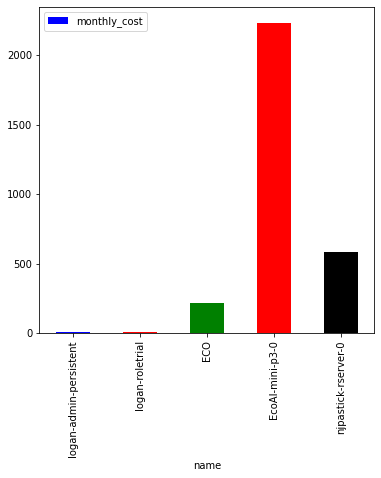

In [24]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'r', 'k']), None, len(df)))
cdf.plot(figsize=(6,6),x ='name', y='monthly_cost', kind = 'bar', color=my_colors)